In [1]:
from sklearn.model_selection import train_test_split,cross_val_score
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
import string
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
import contractions
import seaborn as sns



nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("omw-1.4")





df = pd.read_csv("communications.csv",delimiter=',')
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Date,Release Date,Type,Text
0,2025-03-19,2025-04-09,Minute,Minutes of the Federal Open Market Committee\n...
1,2025-03-19,2025-03-19,Statement,Recent indicators suggest that economic activi...
2,2025-01-29,2025-01-29,Statement,Recent indicators suggest that economic activi...
3,2025-01-29,2025-02-19,Minute,Minutes of the Federal Open Market Committee\n...
4,2024-12-18,2024-12-18,Statement,Recent indicators suggest that economic activi...


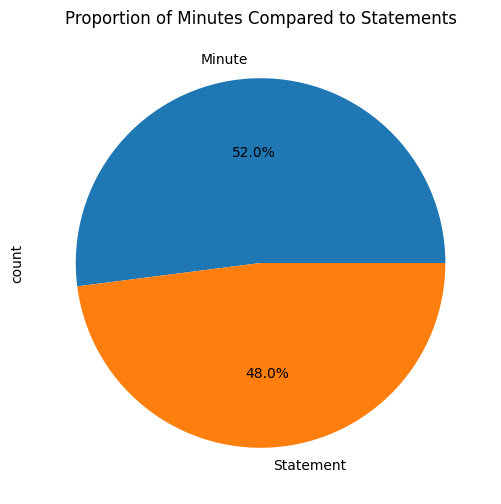

In [2]:
df.drop('Release Date',inplace=True,axis=1)

plt.figure(figsize=(10,6))
df['Type'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title("Proportion of Minutes Compared to Statements")
plt.show()




In [3]:
def clean_text(text):
    text = text.lower()
    text =contractions.fix(text)
    text = re.sub(r'[^A-Za-z0-9\s]','',text)
    text = contractions.fix(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    STOPWORDS = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in STOPWORDS]
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(token) for token in tokens]
    text = " ".join(tokens)
    return text
    
df['clean_text'] = df['Text'].apply(clean_text)
df['clean_text'].head(10)


0    minute federal open market committee march 181...
1    recent indicator suggest economic activity con...
2    recent indicator suggest economic activity con...
3    minute federal open market committee january 2...
4    recent indicator suggest economic activity con...
5    minute federal open market committee december ...
6    minute federal open market committee november ...
7    recent indicator suggest economic activity con...
8    recent indicator suggest economic activity con...
9    minute federal open market committee september...
Name: clean_text, dtype: object

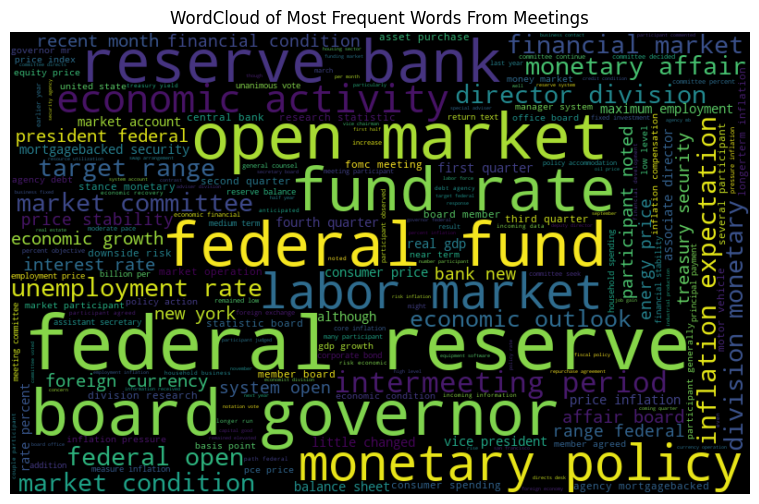

In [4]:
sample = " ".join(i for i in df['clean_text'].astype(str))

plt.figure(figsize=(10,6))
wc = WordCloud(height=500,width=800).generate(sample)
plt.imshow(wc,interpolation="bilinear")
plt.title("WordCloud of Most Frequent Words From Meetings")
plt.axis("off")
plt.show()


In [5]:
"""Most Common Words and Misc NLP Tasks"""


most_common = nltk.FreqDist(TextBlob(sample).words).most_common(100)
print(f'Top 100 Most Common Words from Meetings: {most_common}')

Top 100 Most Common Words from Meetings: [('market', 14828), ('committee', 14155), ('rate', 12739), ('inflation', 12674), ('federal', 11907), ('economic', 9929), ('participant', 9343), ('price', 8651), ('policy', 8506), ('reserve', 7049), ('bank', 6935), ('board', 6835), ('would', 6692), ('growth', 6011), ('condition', 5764), ('financial', 5757), ('monetary', 5753), ('remained', 5121), ('continued', 5089), ('percent', 4974), ('meeting', 4952), ('period', 4871), ('quarter', 4816), ('security', 4805), ('year', 4711), ('recent', 4654), ('labor', 4605), ('level', 4445), ('fund', 4381), ('member', 4290), ('increase', 4202), ('business', 4188), ('open', 4173), ('risk', 4149), ('governor', 3986), ('activity', 3923), ('consumer', 3891), ('foreign', 3856), ('month', 3839), ('outlook', 3822), ('pace', 3773), ('also', 3592), ('division', 3521), ('spending', 3329), ('expected', 3239), ('economy', 3151), ('system', 3125), ('expectation', 3105), ('likely', 3080), ('treasury', 3079), ('credit', 3055)

In [6]:

blob = TextBlob(sample[:1000])
pos_tags = []
for pos in blob.pos_tags:
    pos_tags.append(pos)

print(f'Parts of Speech Tags: {pos_tags}')

Parts of Speech Tags: [('minute', 'JJ'), ('federal', 'JJ'), ('open', 'JJ'), ('market', 'NN'), ('committee', 'NN'), ('march', 'NN'), ('1819', 'CD'), ('2025', 'CD'), ('joint', 'JJ'), ('meeting', 'VBG'), ('federal', 'JJ'), ('open', 'JJ'), ('market', 'NN'), ('committee', 'NN'), ('board', 'NN'), ('governor', 'VBZ'), ('federal', 'JJ'), ('reserve', 'NN'), ('system', 'NN'), ('held', 'VBD'), ('office', 'NN'), ('board', 'NN'), ('governor', 'NN'), ('tuesday', 'IN'), ('18', 'CD'), ('2025', 'CD'), ('900', 'CD'), ('continued', 'VBN'), ('wednesday', 'JJ'), ('march', 'NN'), ('19', 'CD'), ('2025', 'CD'), ('900', 'CD'), ('am1', 'JJ'), ('review', 'NN'), ('monetary', 'JJ'), ('policy', 'NN'), ('strategy', 'NN'), ('tool', 'NN'), ('communication', 'NN'), ('committee', 'NN'), ('participant', 'JJ'), ('continued', 'VBD'), ('discussion', 'NN'), ('related', 'VBN'), ('review', 'JJ'), ('federal', 'JJ'), ('reserve', 'NN'), ('monetary', 'JJ'), ('policy', 'NN'), ('framework', 'NN'), ('focus', 'NN'), ('labor', 'NN'), (

In [7]:
"""POS Tagging
NN:Noun;
ect..."""

tags = []
for tag in blob.tags:
    tags.append(tag)

print(tags)

[('minute', 'JJ'), ('federal', 'JJ'), ('open', 'JJ'), ('market', 'NN'), ('committee', 'NN'), ('march', 'NN'), ('1819', 'CD'), ('2025', 'CD'), ('joint', 'JJ'), ('meeting', 'VBG'), ('federal', 'JJ'), ('open', 'JJ'), ('market', 'NN'), ('committee', 'NN'), ('board', 'NN'), ('governor', 'VBZ'), ('federal', 'JJ'), ('reserve', 'NN'), ('system', 'NN'), ('held', 'VBD'), ('office', 'NN'), ('board', 'NN'), ('governor', 'NN'), ('tuesday', 'IN'), ('18', 'CD'), ('2025', 'CD'), ('900', 'CD'), ('continued', 'VBN'), ('wednesday', 'JJ'), ('march', 'NN'), ('19', 'CD'), ('2025', 'CD'), ('900', 'CD'), ('am1', 'JJ'), ('review', 'NN'), ('monetary', 'JJ'), ('policy', 'NN'), ('strategy', 'NN'), ('tool', 'NN'), ('communication', 'NN'), ('committee', 'NN'), ('participant', 'JJ'), ('continued', 'VBD'), ('discussion', 'NN'), ('related', 'VBN'), ('review', 'JJ'), ('federal', 'JJ'), ('reserve', 'NN'), ('monetary', 'JJ'), ('policy', 'NN'), ('framework', 'NN'), ('focus', 'NN'), ('labor', 'NN'), ('market', 'NN'), ('dyn

In [8]:
""" Tfid vectorizer with type as the target variable"""



le = LabelEncoder()
tfid = TfidfVectorizer()


X = df['clean_text']
y = df['Type']
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

X_train_tfid = tfid.fit_transform(X_train).toarray()
X_test_tfid = tfid.transform(X_test).toarray()



"""For the results of the models"""

models = {
    "logisticregression":LogisticRegression(),
    "multinomialnaivebayes":MultinomialNB(),
    "benoulinaivebayes":BernoulliNB()
    }



def evalaute(model_name,pred,y_test,acc,f1,cv_scores):
    results = {
        "Model":model_name,
        "Accuracy Score":acc,
        "F1 Score":f1,
        "Cross Validation Scores":cv_scores.mean()
        }
    return results


dict_list = []


for model_name,model in models.items():
    model = model.fit(X_train_tfid,y_train)
    pred=  model.predict(X_test_tfid)
    acc = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    cv_scores=  cross_val_score(model, X_train_tfid,y_train,cv=5,scoring="f1")
    dict_list.append(evalaute(model_name, pred, y_test, acc, f1, cv_scores))


df_results = pd.DataFrame(dict_list)
print(df_results)



                   Model  Accuracy Score  F1 Score  Cross Validation Scores
0     logisticregression        1.000000  1.000000                 1.000000
1  multinomialnaivebayes        0.988889  0.986667                 0.979447
2      benoulinaivebayes        1.000000  1.000000                 1.000000


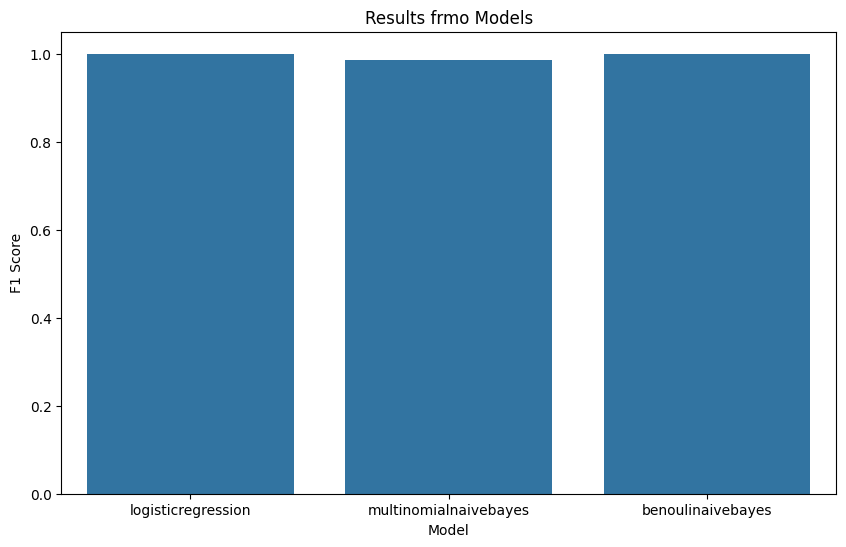

In [9]:

"""plotting the results from the models"""


plt.figure(figsize=(10,6))
sns.barplot(x=df_results['Model'],y=df_results['F1 Score'])
plt.title("Results frmo Models")
plt.show()

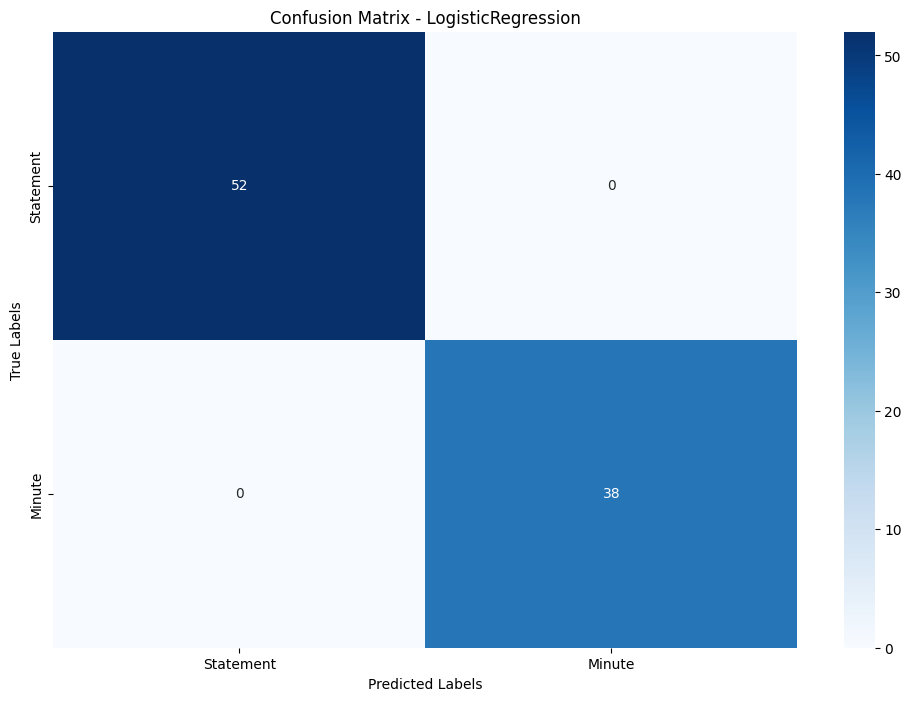

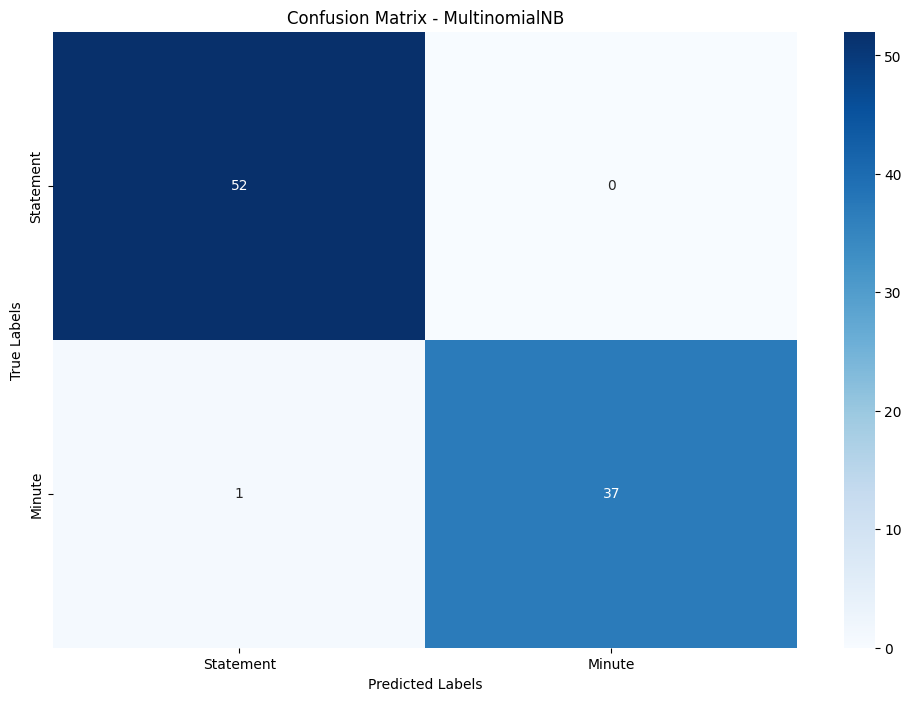

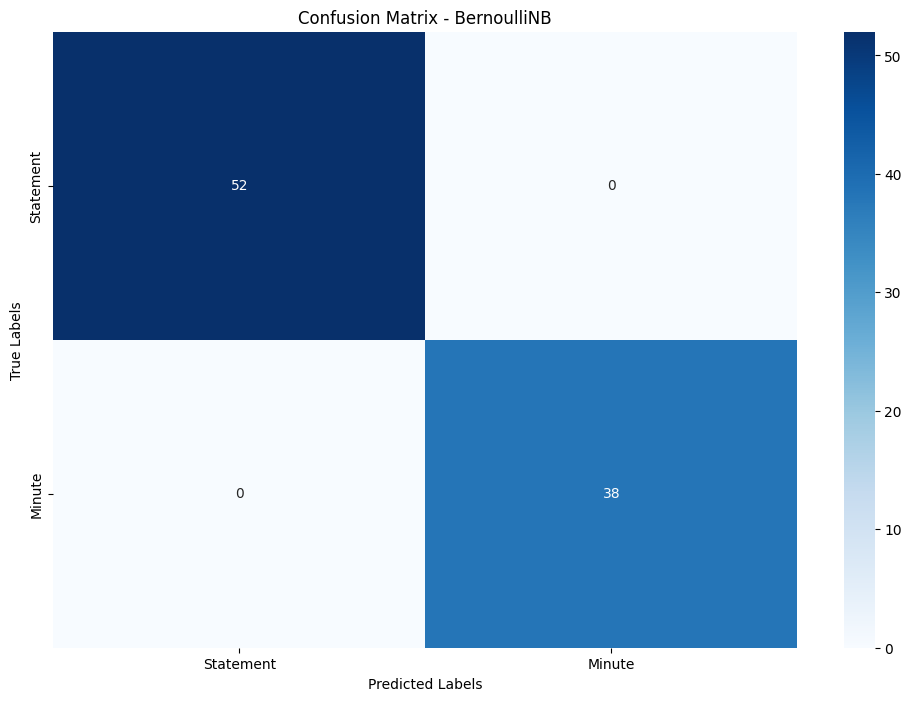

In [10]:
"""Confusion Matrix to view FPR,TPR,FNR,TNR"""


def plot_confusion_matrix(y_test, y_pred, model):
    conmap = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,8))
    sns.heatmap(conmap, annot=True, fmt='d', cmap='Blues',xticklabels=["Statement","Minute"],yticklabels=["Statement","Minute"])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()


for model_name, model in models.items():
    model = model.fit(X_train_tfid, y_train)
    y_pred = model.predict(X_test_tfid)
    plot_confusion_matrix(y_test, y_pred, model)






